In [ ]:
#傳統的groupby(手動樞紐分析)
import numpy as np
import pandas as pd
import seaborn as sns
titanic=sns.load_dataset('titanic')
print(titanic)
print(titanic.groupby('sex')['survived'].mean())
print(titanic.groupby(['sex','class'])['survived'].mean().unstack())

In [ ]:
#樞紐分析語法
import numpy as np
import pandas as pd
import seaborn as sns
titanic=sns.load_dataset('titanic')
print(titanic['fare'])
#多層的樞紐分析表(pivot_table預設的function為mean)
print(titanic.pivot_table('survived',index='sex',columns='class'))#等價於上面最後一個
age=pd.cut(titanic['age'],[0,18,80])
print(titanic.pivot_table('survived',index=['sex',age],columns='class'))#pd.cut切出範圍
fare=pd.cut(titanic['fare'],2)
print(titanic.pivot_table('survived',index=['sex',age],columns=[fare,'class']))
#樞紐分析表額外選項
print(titanic.pivot_table(index='sex',columns='class',aggfunc={'survived':'sum','fare':'mean'}))#用字典讓欄為對應自己要的功能
print(titanic.pivot_table('survived',index='sex',columns='class',margins=True))#margins=True表可以計算總數

       year  month  day gender  births
0      1969      1  1.0      F    4046
1      1969      1  1.0      M    4440
2      1969      1  2.0      F    4454
3      1969      1  2.0      M    4548
4      1969      1  3.0      F    4548
...     ...    ...  ...    ...     ...
15542  2008     10  NaN      M  183219
15543  2008     11  NaN      F  158939
15544  2008     11  NaN      M  165468
15545  2008     12  NaN      F  173215
15546  2008     12  NaN      M  181235

[15547 rows x 5 columns]
gender         F         M
decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428
AxesSubplot(0.125,0.125;0.775x0.755)


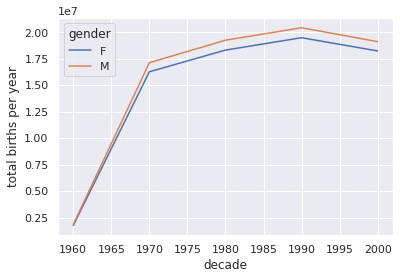

In [ ]:
#範例:出生率資料
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
births=pd.read_csv('/content/drive/MyDrive/資料科學家/DS-Coding/python資料科學學習手冊/data/births.csv')
print(births)
#年轉為10年為一單位
births['decade']=10*(births['year']//10)
print(births.pivot_table('births',index='decade',columns='gender',aggfunc='sum'))
#use Seaborn styles
sns.set()
print(births.pivot_table('births',index='decade',columns='gender',aggfunc='sum').plot())
plt.ylabel('total births per year');

       year  month  day gender  births
0      1969      1  1.0      F    4046
1      1969      1  1.0      M    4440
2      1969      1  2.0      F    4454
3      1969      1  2.0      M    4548
4      1969      1  3.0      F    4548
...     ...    ...  ...    ...     ...
15542  2008     10  NaN      M  183219
15543  2008     11  NaN      F  158939
15544  2008     11  NaN      M  165468
15545  2008     12  NaN      F  173215
15546  2008     12  NaN      M  181235

[15547 rows x 5 columns]
            year  month  day gender  births  decade  dayofweek
1969-01-01  1969      1    1      F    4046    1960          2
1969-01-01  1969      1    1      M    4440    1960          2
1969-01-02  1969      1    2      F    4454    1960          3
1969-01-02  1969      1    2      M    4548    1960          3
1969-01-03  1969      1    3      F    4548    1960          4
...          ...    ...  ...    ...     ...     ...        ...
1988-12-29  1988     12   29      M    5944    1980          3
19

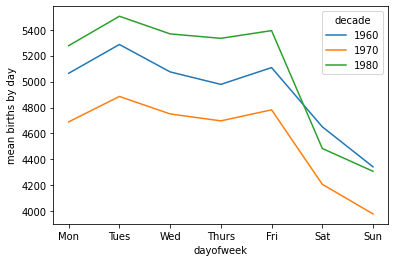

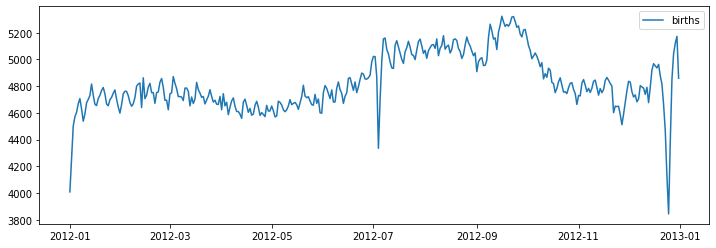

In [19]:
#更多資料探索
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import datetime
import matplotlib.pyplot as plt
births=pd.read_csv('/content/drive/MyDrive/資料科學家/DS-Coding/python資料科學學習手冊/data/births.csv')
print(births)
births['decade']=10*(births['year']//10)
#清理資料
quartiles=np.percentile(births['births'],[25,50,75])
mu=quartiles[1]
sig=0.74*(quartiles[2]-quartiles[0])
births=births.query('(births > @mu - 5* @sig)&(births < @mu +5* @sig)')
#合併day、month、year為一個date索引
births['day']=births['day'].astype(int)
births.index=pd.to_datetime(10000*births.year +
              100*births.month+
              births.day,format='%Y%m%d')#可將此數值轉為年月日
births['dayofweek']=births.index.dayofweek#輸出該日期為星期幾(Monday:0,Sunday:6)
print(births)
#星期一到星期日的平均出生人數
print(births.pivot_table('births',index='dayofweek',columns='decade',aggfunc='mean'))
print(births.pivot_table('births',index='dayofweek',columns='decade',aggfunc='mean').plot())
plt.gca().set_xticklabels(['None','Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.ylabel('mean births by day');
#依每月每日平均人數
births_by_date=births.pivot_table('births',index=['month','day'])
print(births_by_date)
#圖
births_by_date.index=[datetime.date(2012,month,day) 
           for (month,day) in births_by_date.index]
print(births_by_date)
fig,ax=plt.subplots(figsize=(12,4))
print(births_by_date.plot(ax=ax))